radius: 33
minVal: 165.0 
maxVal: 242.0


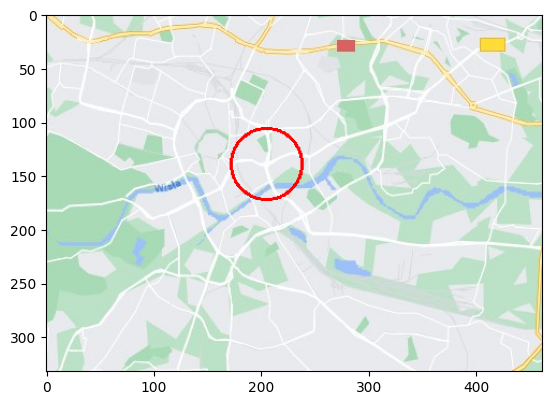

In [123]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
import cv2

# load the image and convert it to grayscale
image = cv2.imread("test3.jpg")
if image is None:
    print("No image found!")
(height, width, channels) = image.shape
orig = image.copy()
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
grayBlurred = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# apply a Gaussian blur to the image to average out noise, then find the brightest region
imagePercentage = 0.08
radius = int(np.ceil((height + width) / 2 * imagePercentage) // 2 * 2 + 1)
print(f"radius: {radius}")
grayBlurred = cv2.GaussianBlur(grayBlurred, (radius, radius), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(grayBlurred)
imageWithCircle = orig.copy()
cv2.circle(imageWithCircle, maxLoc, radius, (255, 0, 0), 2)
# display brightest found region
plt.imshow(imageWithCircle)
print(f"minVal: {minVal} \nmaxVal: {maxVal}")

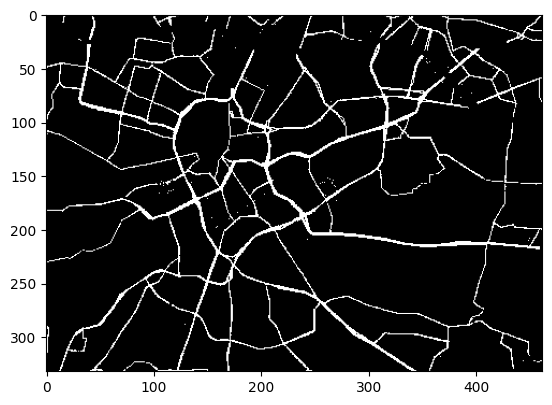

In [124]:
#apply treshold
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
(T, thresh) = cv2.threshold(gray, maxVal, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap="gray")

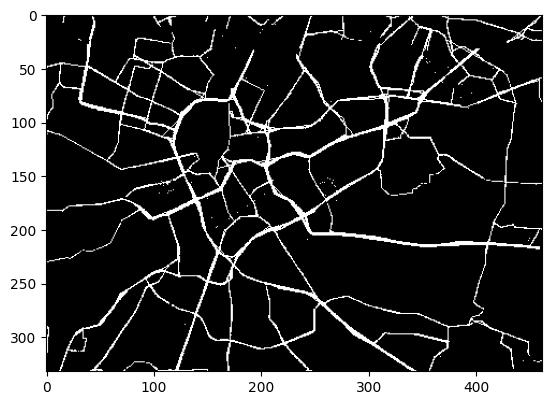

In [125]:
#Connect broken lines
lines = cv2.HoughLinesP(thresh, rho=1, theta=np.pi/180, threshold=30,
                            minLineLength=30, maxLineGap=np.ceil((height + width) / 2 * 0.02))
threshCopy = thresh.copy()
for line in lines:
    cv2.line(threshCopy, (line[0][0], line[0][1]), (line[0][2],line[0][3]), (255,0,0), 1)
plt.imshow(threshCopy, cmap='gray')